# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [2]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from sklearn import metrics


In [4]:
# Read the CSV file 
telecom_df = pd.read_csv("telecom_churn.csv")

In [5]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
# Load the bottom 5 instances 
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [7]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [8]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [9]:
# Obtain the summary of the dataframe data types
telecom_df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [10]:
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# DATA VISUALIZATION

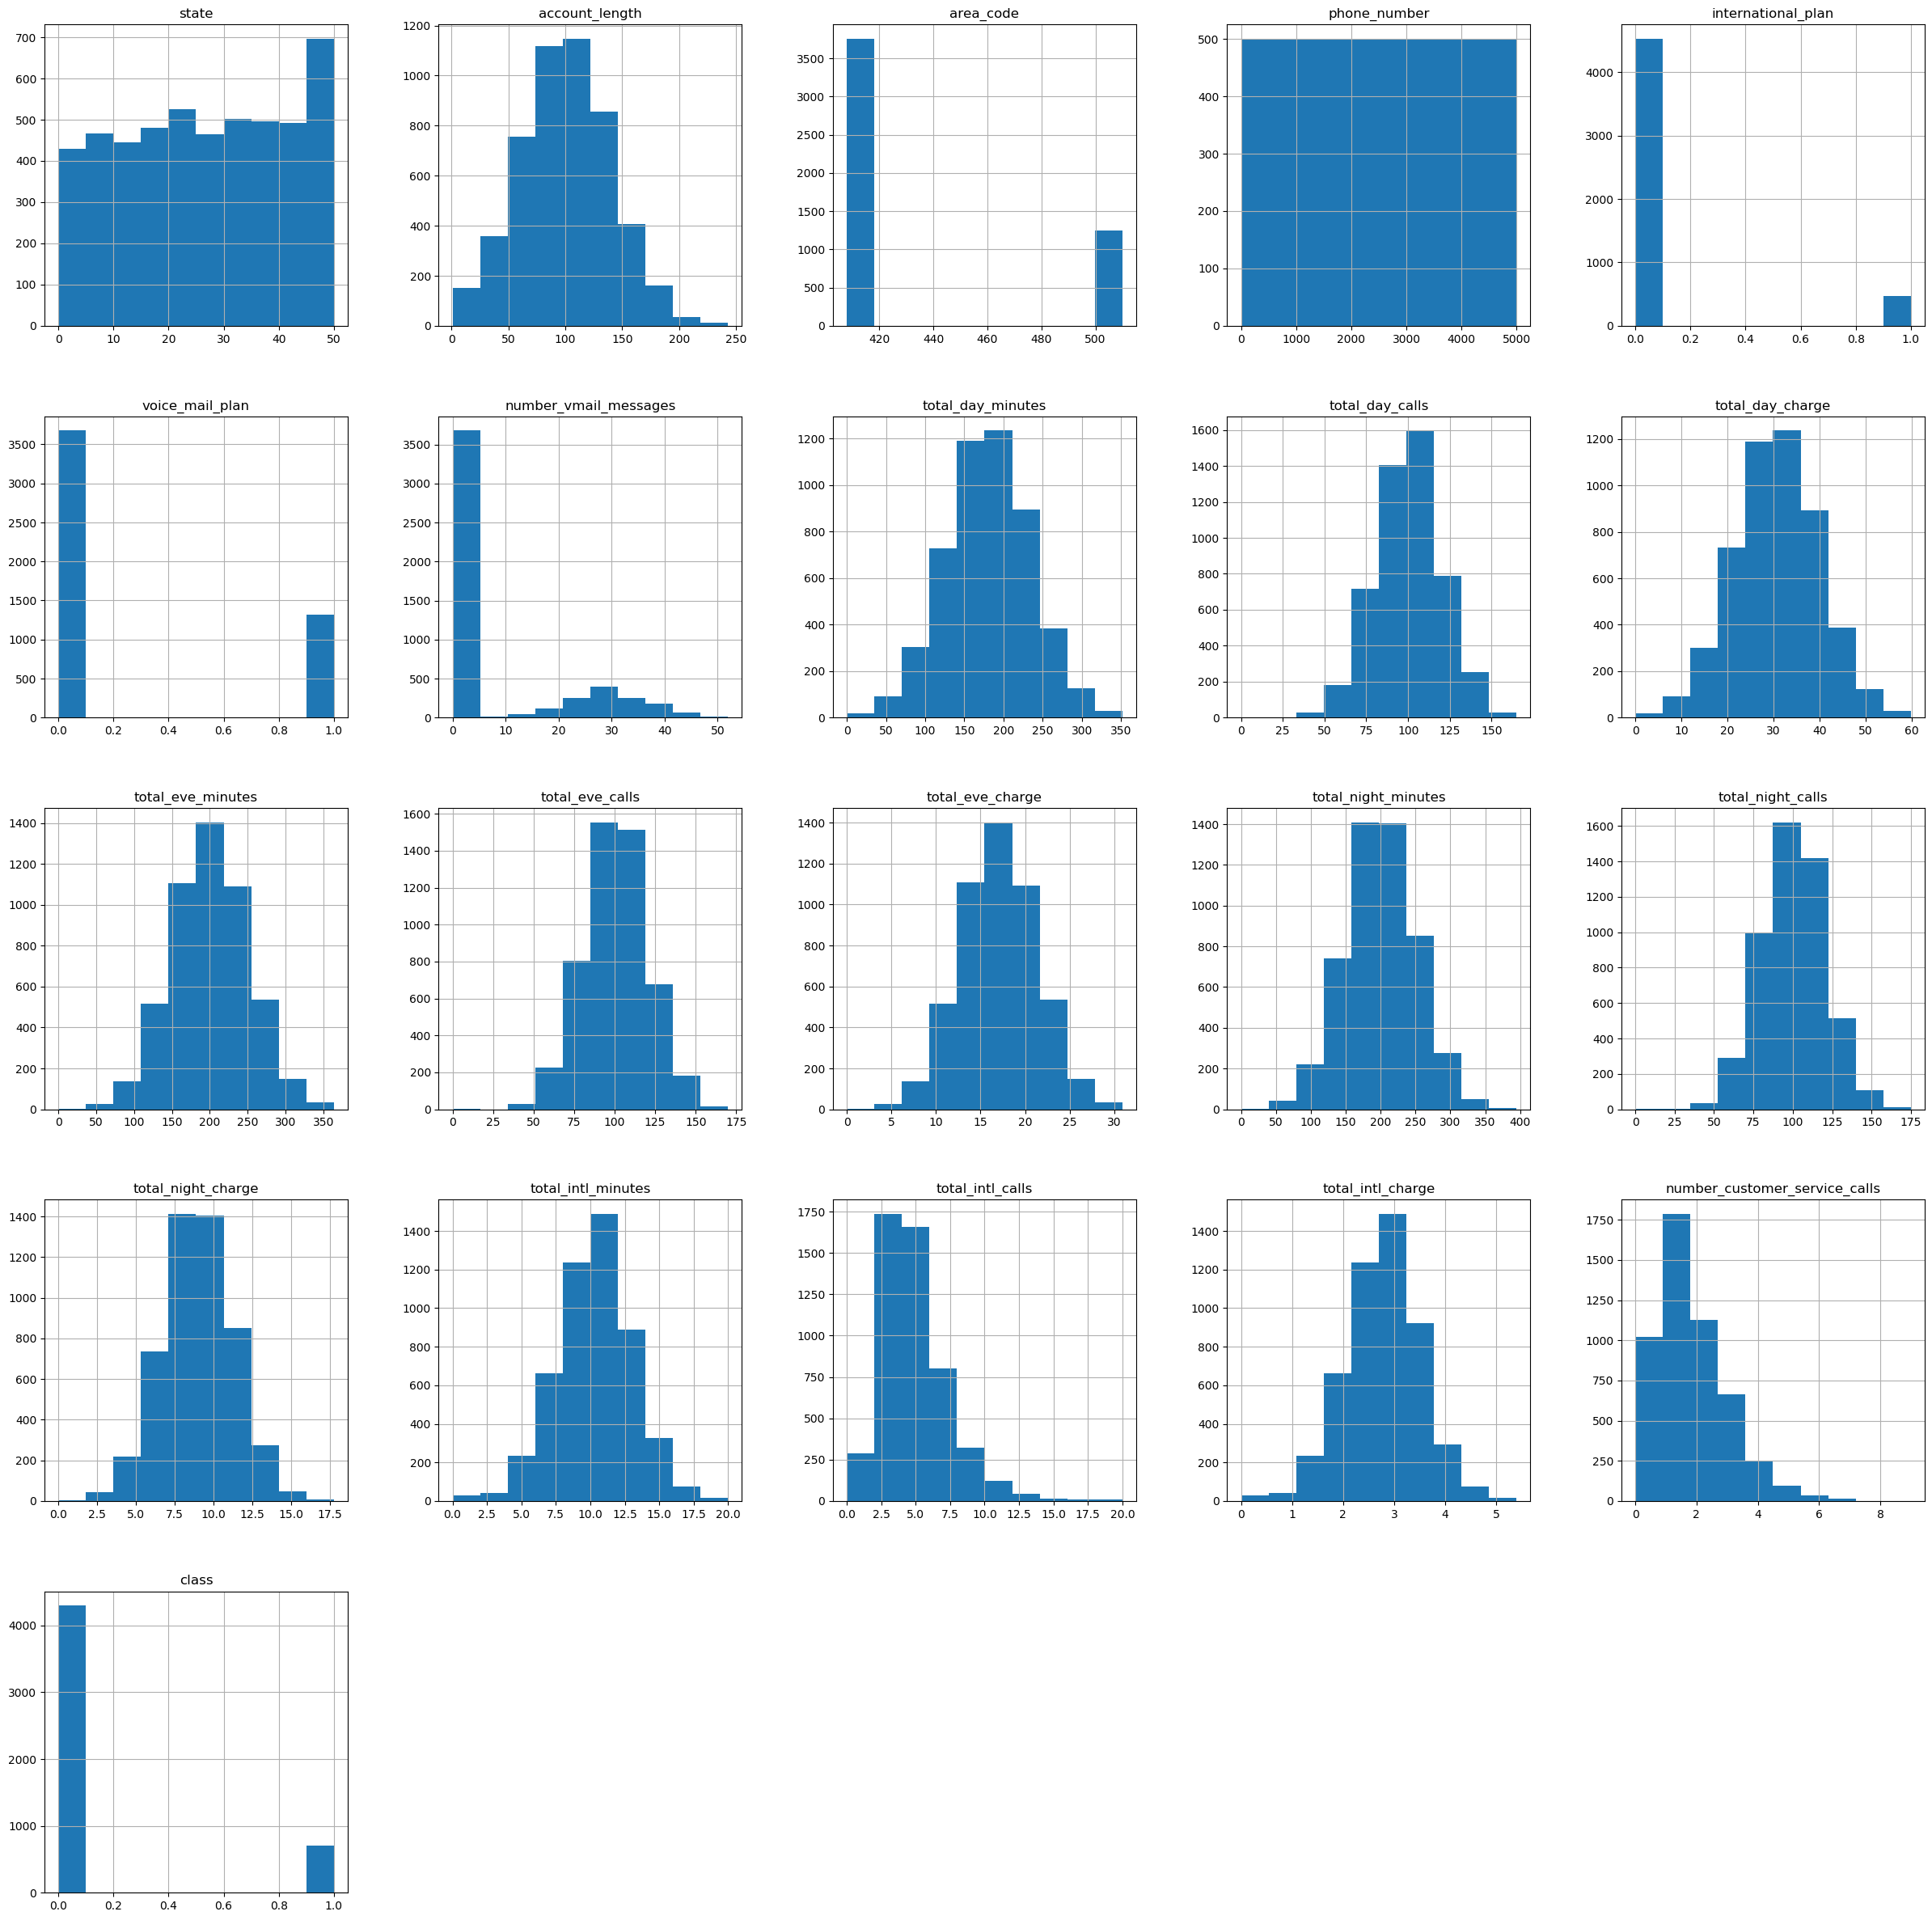

In [11]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [12]:
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [13]:
plt.figure(figsize = [10, 10])
telecom_df["class"].value_counts().plot(kind='pie')

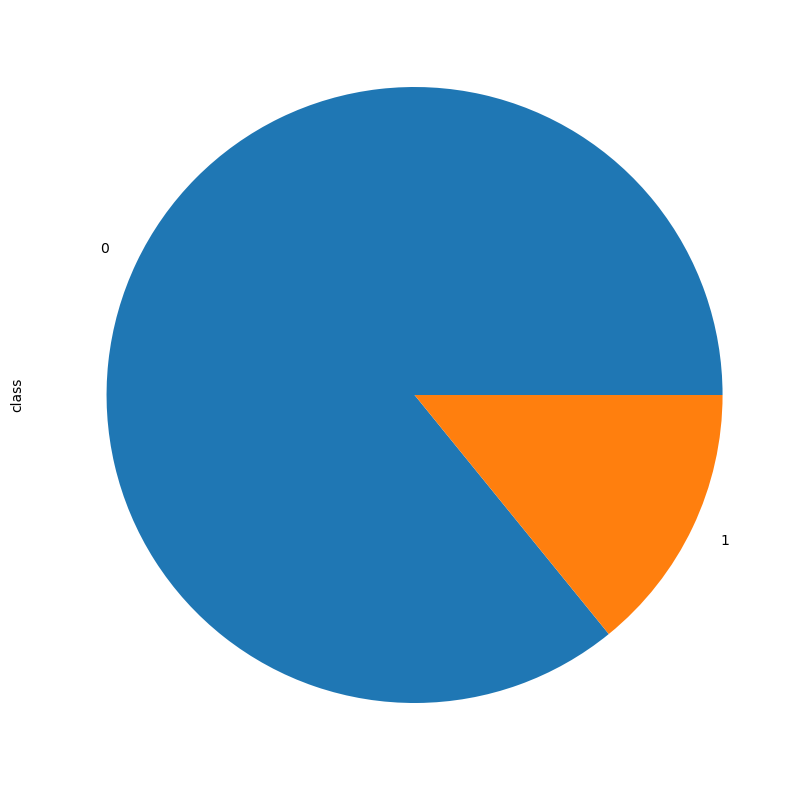

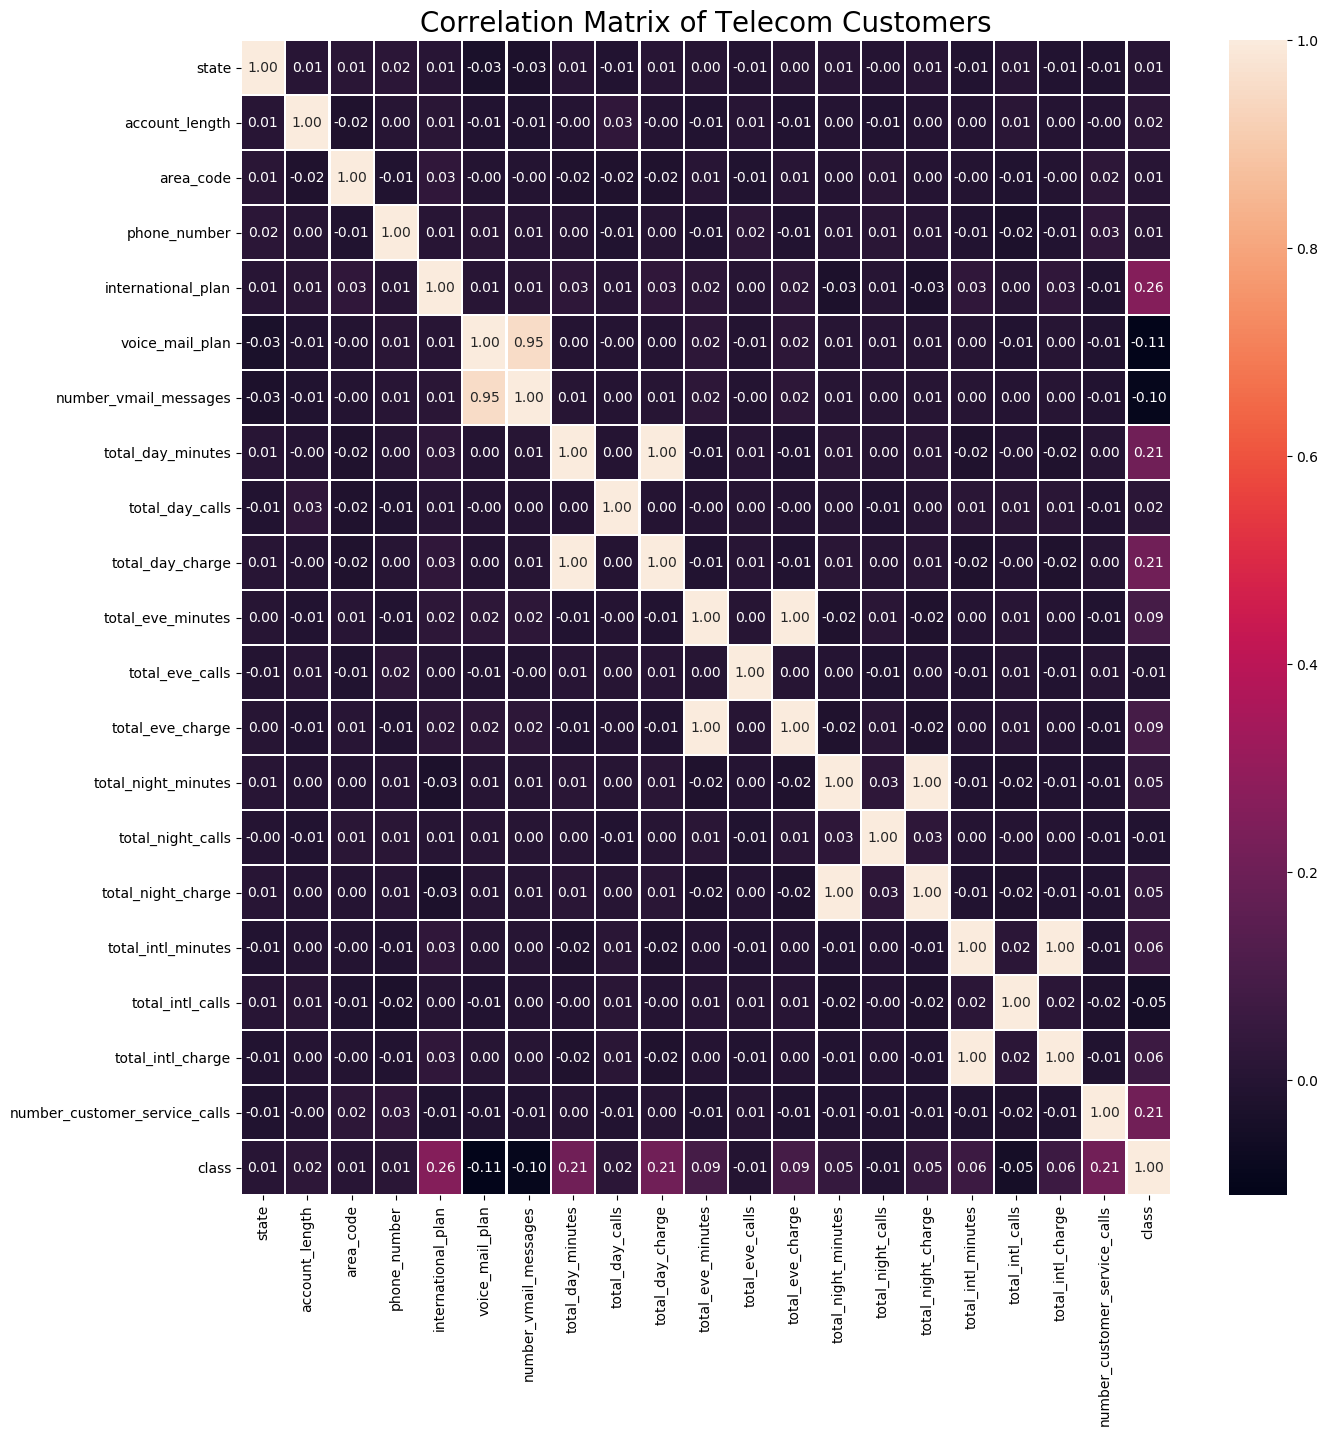

In [14]:
# Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

In [15]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of day charges by churn')

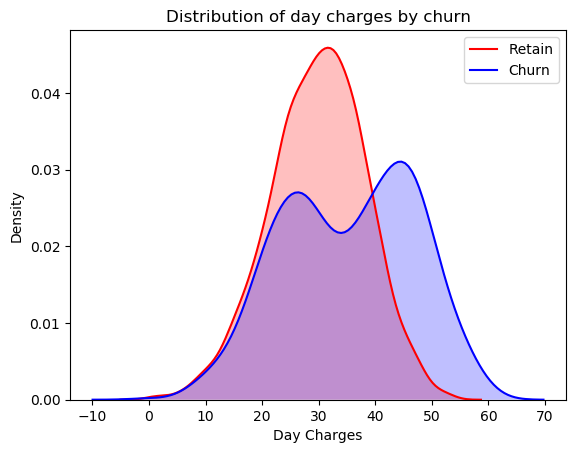

In [16]:
plt.show()

In [17]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

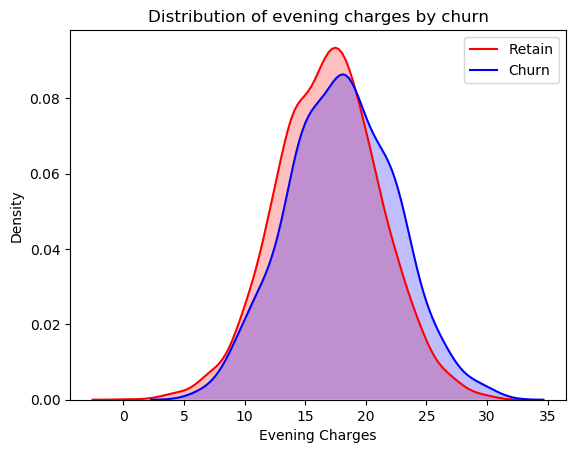

In [18]:
plt.show()

# IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [19]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [20]:
X.shape

(5000, 18)

In [21]:
y.shape

(5000,)

In [22]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [23]:
X_train.shape

(3500, 18)

In [24]:
X_test.shape

(1500, 18)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# ravel returns flatten data
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

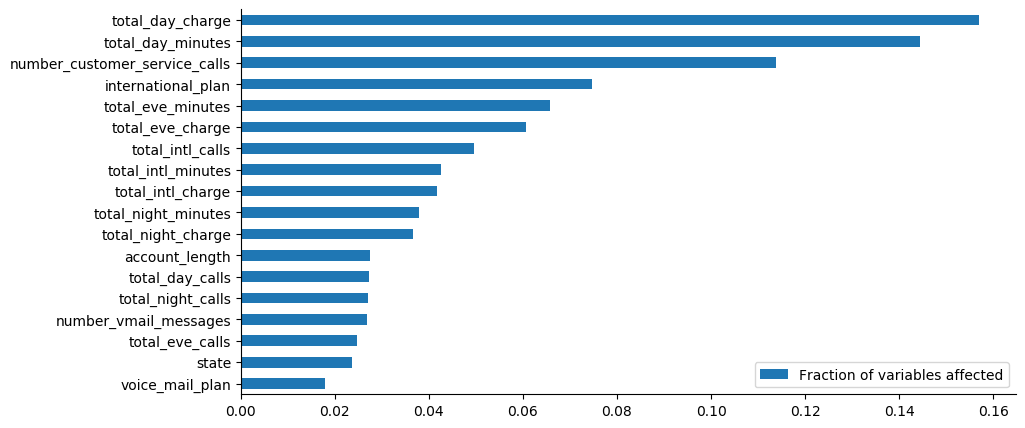

In [27]:
plt.show()

In [28]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_charge" tops the list of important features followed by "total_day_minutes" and so on.

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
        
model_LR.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predict = model_LR.predict(X_test)

In [31]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.42      0.09      0.15       201

    accuracy                           0.86      1500
   macro avg       0.65      0.54      0.54      1500
weighted avg       0.81      0.86      0.82      1500



# TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [32]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=100000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [33]:
y_predict = model_svm.predict(X_test)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1299
           1       0.53      0.15      0.24       201

    accuracy                           0.87      1500
   macro avg       0.70      0.57      0.58      1500
weighted avg       0.83      0.87      0.84      1500



In [35]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_predict = model_rf.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.76      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.96      0.96      0.96      1500



In [39]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
y_predict = model_knn.predict(X_test) 

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



In [43]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_predict = model_gnb.predict(X_test)

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



In [48]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [49]:
model_LR.predict_proba(X_test)
# The first element is the probability that the output will be 0 
# The second element is the probabiliy that the output will be 1

array([[0.97154808, 0.02845192],
       [0.92091   , 0.07909   ],
       [0.90324102, 0.09675898],
       ...,
       [0.91929645, 0.08070355],
       [0.94387685, 0.05612315],
       [0.97626365, 0.02373635]])

In [50]:
model_LR.predict_proba(X_test)[:, 1]

array([0.02845192, 0.07909   , 0.09675898, ..., 0.08070355, 0.05612315,
       0.02373635])

In [51]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [52]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [53]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 2.30946882e-03,
       2.30946882e-03, 3.07929176e-03, 3.07929176e-03, 6.15858353e-03,
       6.15858353e-03, 8.46805235e-03, 8.46805235e-03, 1.23171671e-02,
       1.23171671e-02, 1.53964588e-02, 1.53964588e-02, 1.69361047e-02,
       1.69361047e-02, 1.84757506e-02, 1.84757506e-02, 1.92455735e-02,
       1.92455735e-02, 2.15550423e-02, 2.15550423e-02, 2.30946882e-02,
       2.30946882e-02, 2.38645112e-02, 2.38645112e-02, 2.69438029e-02,
       2.69438029e-02, 2.84834488e-02, 2.84834488e-02, 3.61816782e-02,
       3.61816782e-02, 3.77213241e-02, 3.77213241e-02, 3.84911470e-02,
       3.84911470e-02, 3.92609700e-02, 3.92609700e-02, 4.08006159e-02,
       4.08006159e-02, 4.15704388e-02, 4.15704388e-02, 4.46497306e-02,
       4.46497306e-02, 4.54195535e-02, 4.54195535e-02, 4.61893764e-02,
       4.61893764e-02, 5.08083141e-02, 5.08083141e-02, 5.15781370e-02,
       5.15781370e-02, 5.23479600e-02, 5.23479600e-02, 6.23556582e-02,
      

In [54]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.0199005 , 0.0199005 , 0.02487562, 0.02487562,
       0.039801  , 0.039801  , 0.04477612, 0.04477612, 0.06965174,
       0.06965174, 0.07462687, 0.07462687, 0.07960199, 0.07960199,
       0.08955224, 0.08955224, 0.09452736, 0.09452736, 0.10945274,
       0.10945274, 0.11442786, 0.11442786, 0.11940299, 0.11940299,
       0.12437811, 0.12437811, 0.12935323, 0.12935323, 0.13930348,
       0.13930348, 0.14427861, 0.14427861, 0.15422886, 0.15422886,
       0.1641791 , 0.1641791 , 0.17412935, 0.17412935, 0.1840796 ,
       0.1840796 , 0.18905473, 0.18905473, 0.19402985, 0.19402985,
       0.2039801 , 0.2039801 , 0.21393035, 0.21393035, 0.21890547,
       0.21890547, 0.2238806 , 0.2238806 , 0.22885572, 0.22885572,
       0.23880597, 0.23880597, 0.24378109, 0.24378109, 0.25870647,
       0.25870647, 0.26865672, 0.26865672, 0.27363184, 0.27363184,
       0.27860697, 0.27860697, 0.28855721, 0.28855721, 0.29353

In [55]:
thresh1

array([1.84303995, 0.84303995, 0.83092774, 0.76235479, 0.7589229 ,
       0.7529486 , 0.73318586, 0.69312782, 0.69179623, 0.6538519 ,
       0.63330035, 0.57941451, 0.57917613, 0.5426829 , 0.52471972,
       0.51624096, 0.51415923, 0.51252089, 0.50996656, 0.50703892,
       0.50413607, 0.49259372, 0.49227476, 0.48499853, 0.47798846,
       0.4775751 , 0.47384527, 0.45463654, 0.45315483, 0.450561  ,
       0.44817077, 0.43137487, 0.42629044, 0.41581148, 0.41506518,
       0.41457783, 0.41330155, 0.4125365 , 0.41051451, 0.40644541,
       0.40258802, 0.40062359, 0.39711544, 0.39217682, 0.38935863,
       0.38705492, 0.38336152, 0.38230526, 0.38118584, 0.372835  ,
       0.36946483, 0.36857125, 0.36687482, 0.36659908, 0.36545632,
       0.35506368, 0.35312505, 0.35250868, 0.35123894, 0.3463604 ,
       0.34429722, 0.33862677, 0.33742825, 0.33582624, 0.33344124,
       0.33211602, 0.3305513 , 0.33002162, 0.32897467, 0.31970444,
       0.31829652, 0.31756474, 0.31574557, 0.30747479, 0.30737

In [56]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [57]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6994052064542569
Support Vector Machine:  0.8058935499561469
Random Forest:  0.9081689320908929
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


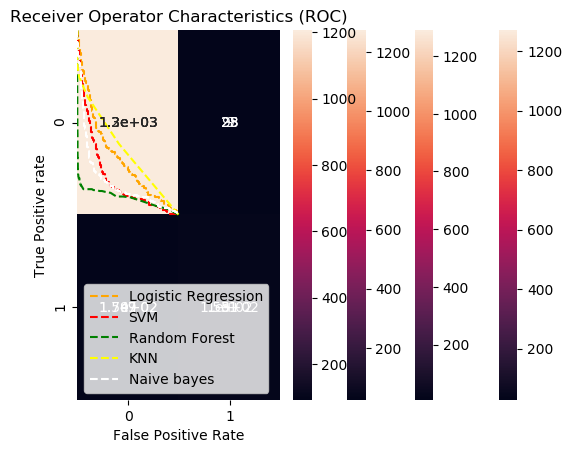

In [58]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# CONCLUSION

In [60]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.76      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.96      0.96      0.96      1500



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/